In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("merged_dataset.csv")
df.head()

,Num_Acc,date,hour,minute,lighting,intersection,atmosphere,collision,postal_address,localisation,...,user_sex,pedestrian_action,vehicle_ID,road_category,traff_regime,no_traff_lanes,longitud_profile,drawing_plan,surface_cond,acc_situation
0,201600000001,2016-01-02,14,45,Full day,Out of intersection,Cloudy weather,By the side,"46, rue Sonneville",In built-up areas,...,Male,not specified,A01,Departmental Road,Bidirectional,0.0,Dish,Curved right,normal,On the road
1,201600000002,2016-03-16,18,0,Full day,Giratory,Normal,Other,1a rue du cimetière,In built-up areas,...,Female,not specified,A01,Departmental Road,One way,0.0,Dish,Curved left,normal,On the road
2,201600000003,2016-07-13,19,0,Full day,Out of intersection,Normal,Other,None,Out of agglomeration,...,Male,Opposite direction of the vehicle,A01,Departmental Road,Bidirectional,2.0,Dish,Curved right,wet,On the verge
3,201600000004,2016-08-15,19,30,Twilight or dawn,Out of intersection,Dazzling weather,By the side,52 rue victor hugo,In built-up areas,...,Male,not specified,B02,Communal Way,Bidirectional,0.0,Dish,Straight part,normal,On the road
4,201600000005,2016-12-23,11,0,Full day,T Intersection,Normal,By the side,rue Joliot curie,In built-up areas,...,Female,not specified,B02,Communal Way,Bidirectional,0.0,Dish,Straight part,normal,On the road


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 22 columns):
Num_Acc              839985 non-null int64
date                 839985 non-null object
hour                 839985 non-null int64
minute               839985 non-null int64
lighting             839985 non-null object
intersection         839985 non-null object
atmosphere           839985 non-null object
collision            839985 non-null object
postal_address       839985 non-null object
localisation         839985 non-null object
user_category        839985 non-null object
accident_severity    839985 non-null object
user_sex             839985 non-null object
pedestrian_action    839985 non-null object
vehicle_ID           839985 non-null object
road_category        839985 non-null object
traff_regime         839985 non-null object
no_traff_lanes       839985 non-null float64
longitud_profile     839985 non-null object
drawing_plan         839985 non-null object
surface_con

In [4]:
sns.set_style("whitegrid")
df["date"] = pd.to_datetime(df["date"])
acc = df["accident_severity"]

## Date & time variations
- There is a **yearly** decrease in accident count
- The **month** and **weekday** do not show signoficant change in accident count
- The **hourly** accident count has a large variation, it is no doubt that more or less accidents occur at different times of the day

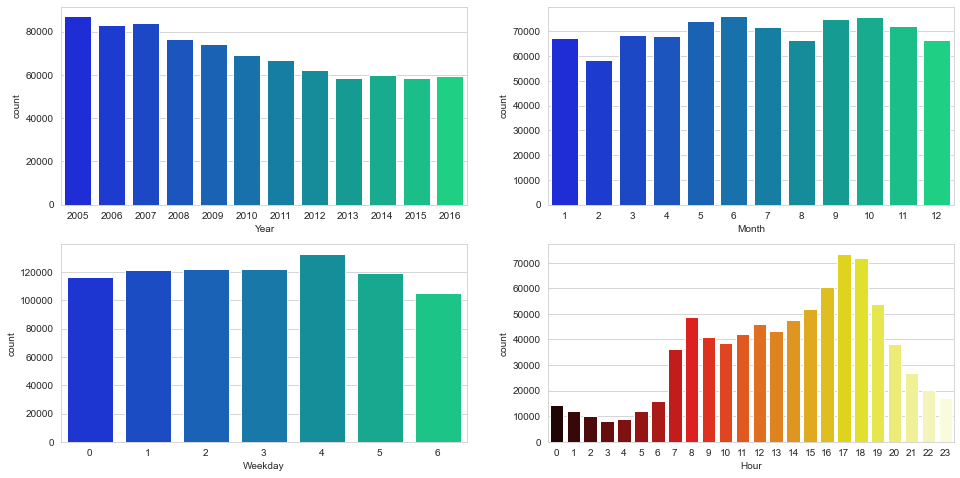

In [5]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,8)

sns.countplot(x=df["date"].dt.year, palette="winter", ax=axes[0,0]).set(xlabel="Year")
sns.countplot(x=df["date"].dt.month, palette="winter", ax=axes[0,1]).set(xlabel="Month")
sns.countplot(x=df["date"].dt.weekday, palette="winter", ax=axes[1,0]).set(xlabel="Weekday")
sns.countplot(x=df["hour"], palette="hot", ax=axes[1,1]).set(xlabel="Hour")

plt.show()

### Time Based Variations on Accident Severity
The distribution of **accident severity** remains almost constant accross different time interval, except in the hourly variation. Hence none of the date & time variables except **hour** would be beneficial in predicting accident severity.

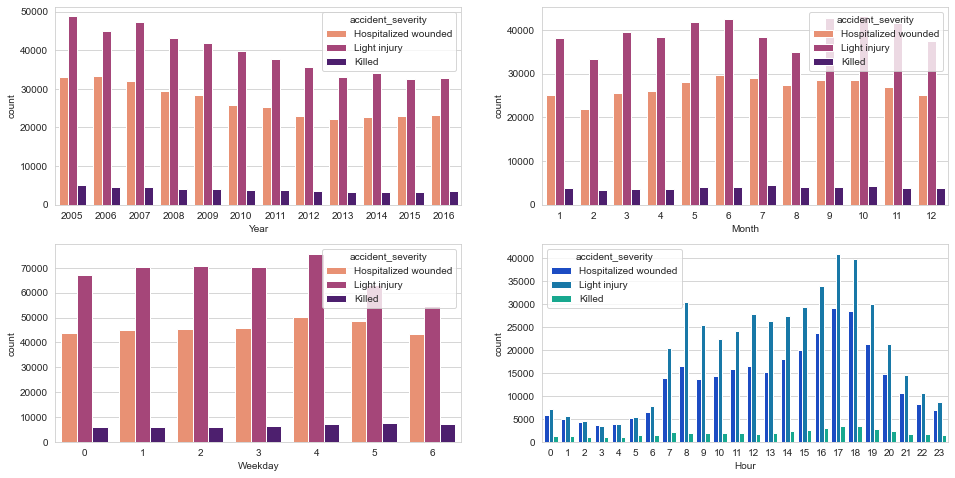

In [6]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,8)

sns.countplot(x=df["date"].dt.year, hue=acc, palette="magma_r", ax=axes[0,0]).set(xlabel="Year")
sns.countplot(x=df["date"].dt.month, hue=acc, palette="magma_r", ax=axes[0,1]).set(xlabel="Month")
sns.countplot(x=df["date"].dt.weekday, hue=acc, palette="magma_r", ax=axes[1,0]).set(xlabel="Weekday")
sns.countplot(x=df["hour"], hue=acc, palette="winter", ax=axes[1,1]).set(xlabel="Hour")

plt.show()

# Categorical Variations
All features of this dataset are categorical, the only logical analysis that can be done are based on occurance distribution (count)

In [7]:
def compare_plots(column, palette="Twilight"):
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(20,5)
    
    sns.countplot(x=column, order=column.value_counts().index, ec="Black", palette=palette, ax=axes[0])
    sns.countplot(x=column, order=column.value_counts().index, hue=acc, ec="Black", palette=palette, ax=axes[1])
    fig.autofmt_xdate(rotation=20 )
    plt.show()


## Accident severity

<function matplotlib.pyplot.show(close=None, block=None)>

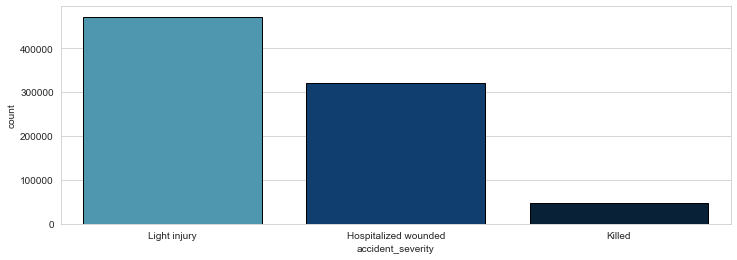

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x=df["accident_severity"], order=df["accident_severity"].value_counts().index, ec="Black", palette="ocean_r")
plt.show

## Lighting

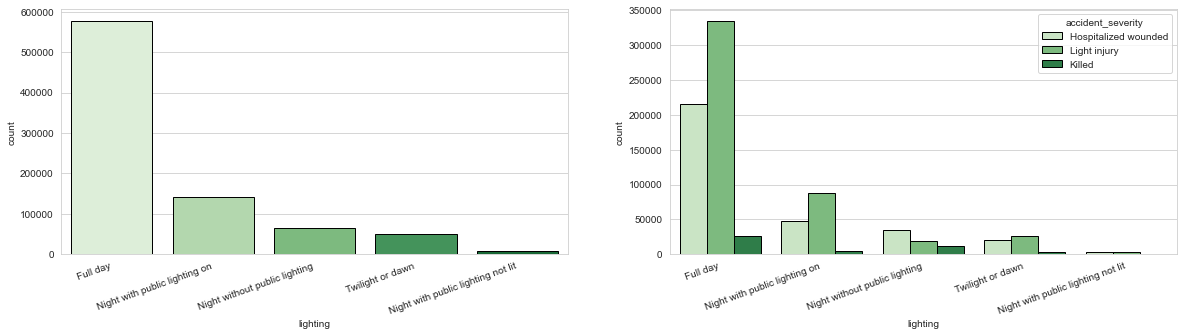

In [9]:
compare_plots(df["lighting"], "Greens")

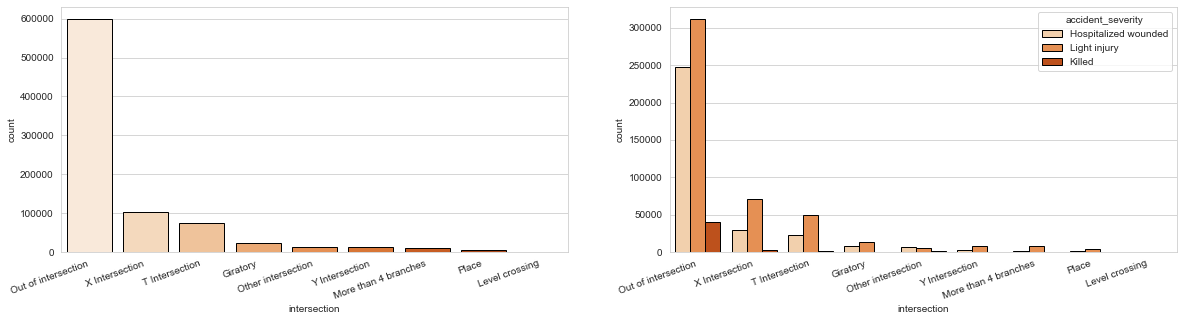

In [10]:
compare_plots(df["intersection"], "Oranges")

It experiences a high class imbalance, thus the classes were combined to only **Out of intersection** and **In intersection**

In [11]:
df["intersection"].value_counts()

Out of intersection     599758
X Intersection          103008
T Intersection           73774
Giratory                 22358
Other intersection       13247
Y Intersection           11481
More than 4 branches      9364
Place                     6075
Level crossing             920
Name: intersection, dtype: int64

In [12]:
df["intersection"].replace(to_replace=["X Intersection", "T Intersection", "Giratory", "Other intersection",
                                       "Y Intersection", "More than 4 branches", "Place", "Level crossing"],
                           value="In intersection", inplace=True)

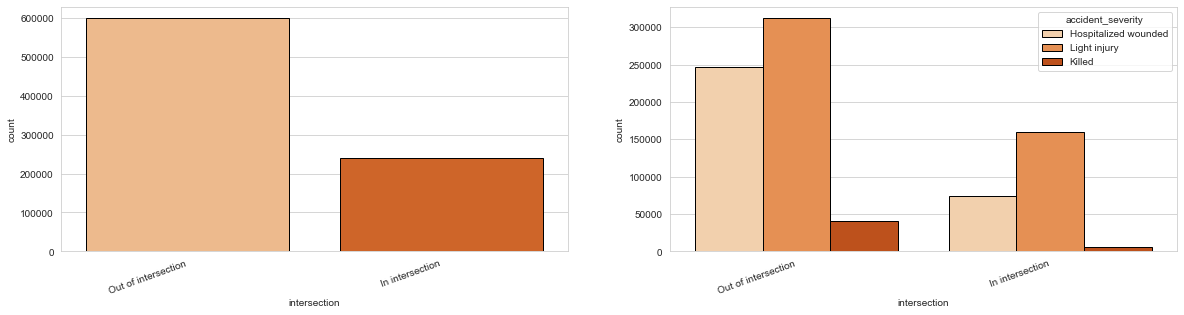

In [13]:
compare_plots(df["intersection"], "Oranges")

## Atmosphere
There is no significant cue as to how importance this feature will be in our prediction.<br>
More analysis will be done

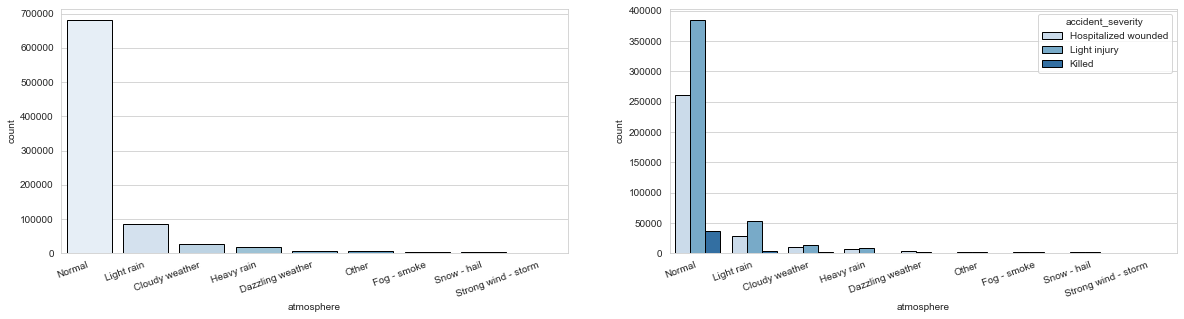

In [14]:
compare_plots(df["atmosphere"], "Blues")

## Collision
Accidents occuring at the **front** seems to result in more **hospitalized injury** cases

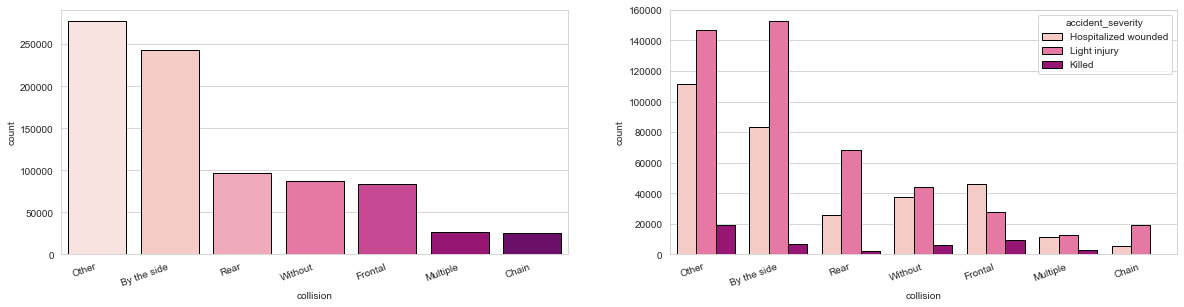

In [15]:
compare_plots(df["collision"], "RdPu")

## Localisation
Accidents occuring **Out of agglomeration** tend to lead to alot more **hospitalized injuries**

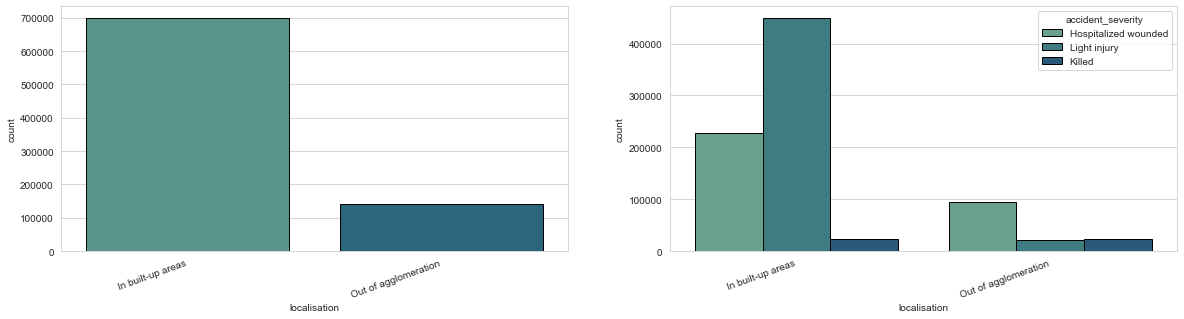

In [16]:
compare_plots(df["localisation"], "crest")

## User Category
Further analysis should be done

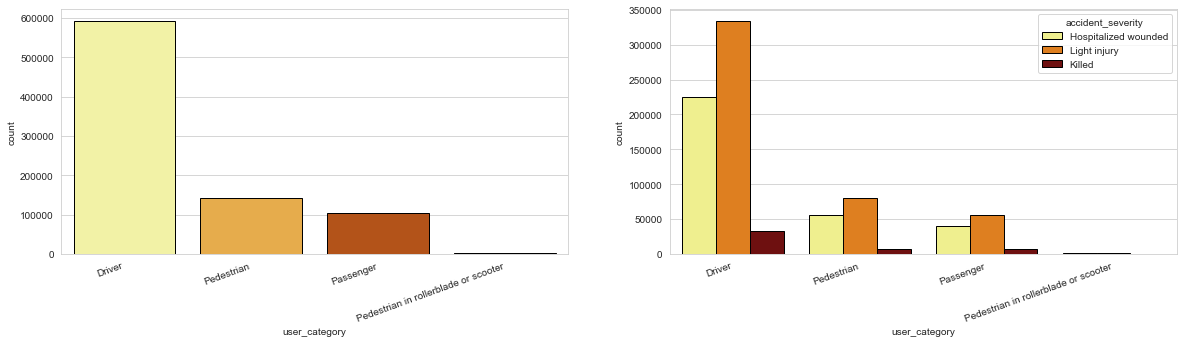

In [17]:
compare_plots(df["user_category"], "afmhot_r")

## User Sex
This feature should be dropped as it is not a direct predictor of the severity of an accident

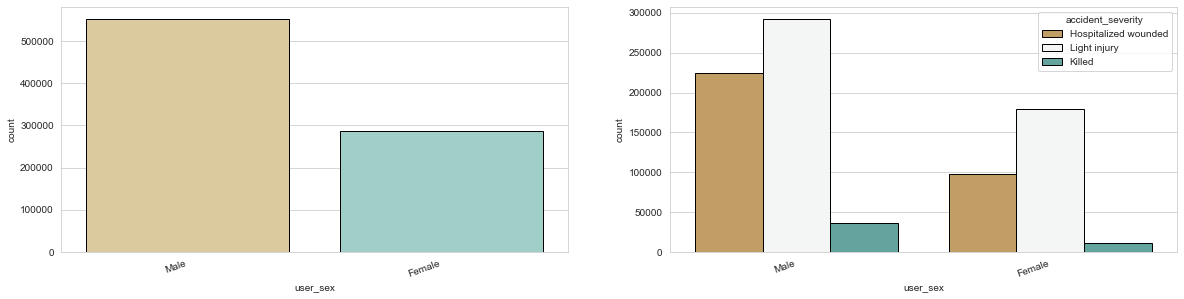

In [18]:
compare_plots(df["user_sex"], "BrBG")

## Pedestrian Action

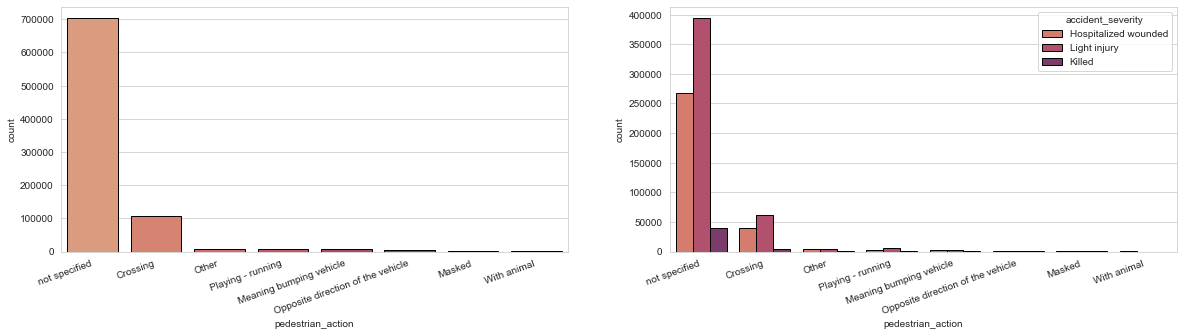

In [19]:
compare_plots(df["pedestrian_action"], "flare")

## Road Category
Shows great variation against accident severity

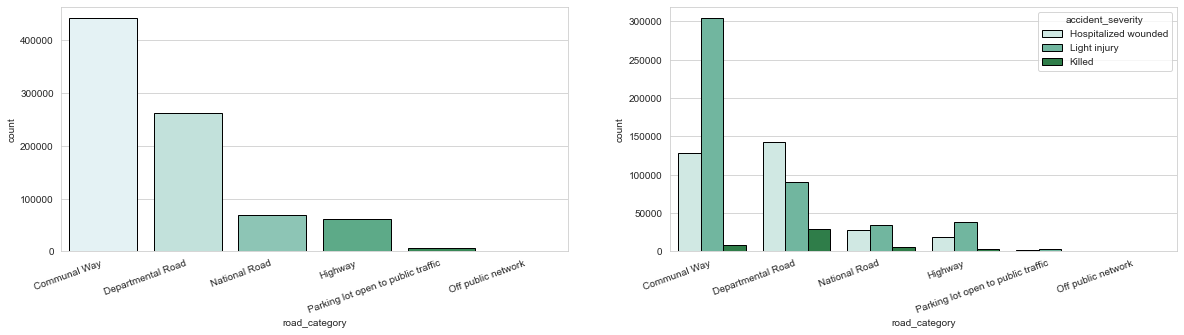

In [20]:
compare_plots(df["road_category"], "BuGn")

## Traffic Regime

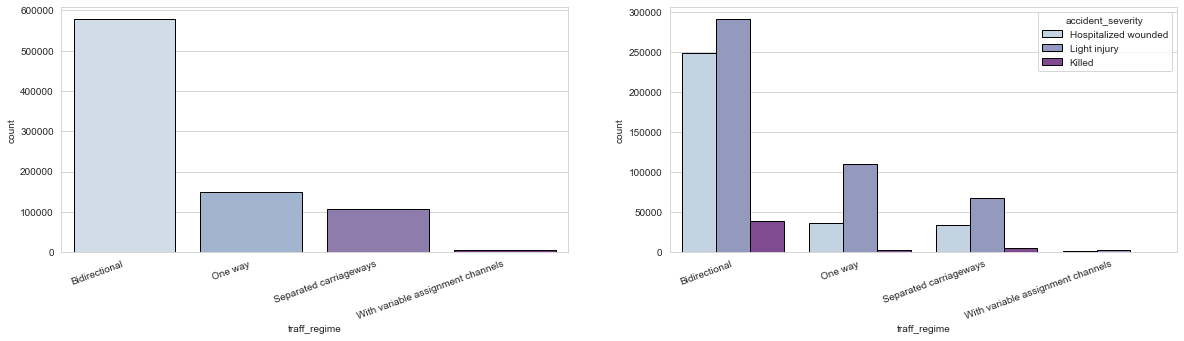

In [21]:
compare_plots(df["traff_regime"], "BuPu")

## Number of traffic lanes
This column can be dropped as it seems to have incorrect values.<br>
A road of 50 traffic lanes is unreal

In [22]:
df["no_traff_lanes"].value_counts()

2.0     466506
0.0     102796
1.0     101345
4.0      76934
3.0      66252
6.0      13945
5.0       7839
8.0       2332
7.0        840
10.0       407
20.0       241
50.0       158
9.0        148
11.0        32
12.0        32
40.0        30
30.0        27
13.0        15
25.0        14
21.0        11
26.0         9
15.0         8
90.0         7
14.0         6
24.0         6
70.0         5
22.0         5
31.0         3
60.0         3
17.0         2
16.0         2
53.0         2
27.0         2
45.0         2
41.0         1
44.0         1
33.0         1
29.0         1
52.0         1
39.0         1
28.0         1
36.0         1
62.0         1
42.0         1
76.0         1
65.0         1
84.0         1
23.0         1
91.0         1
54.0         1
18.0         1
86.0         1
99.0         1
Name: no_traff_lanes, dtype: int64

In [23]:
df.drop(columns="no_traff_lanes", inplace=True)

## Longitudinal Profile

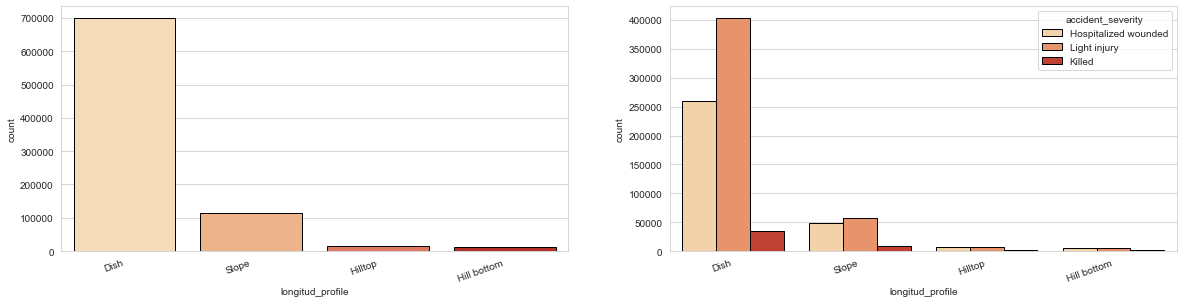

In [24]:
compare_plots(df["longitud_profile"], "OrRd")

## Drawing Plan

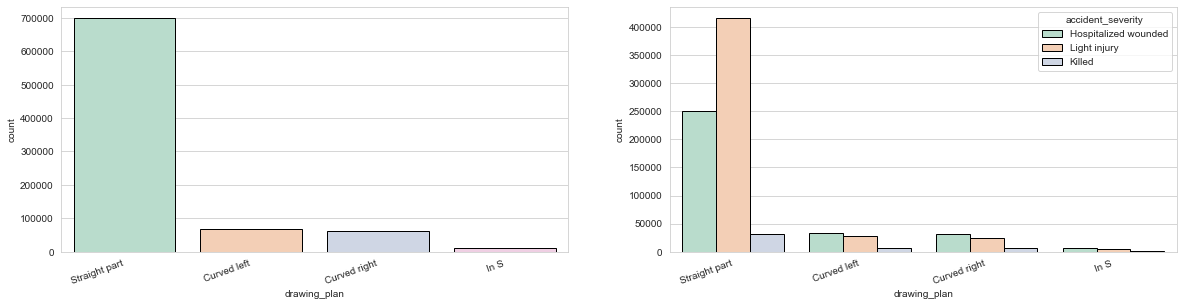

In [25]:
compare_plots(df["drawing_plan"], "Pastel2")

## Surface Condition

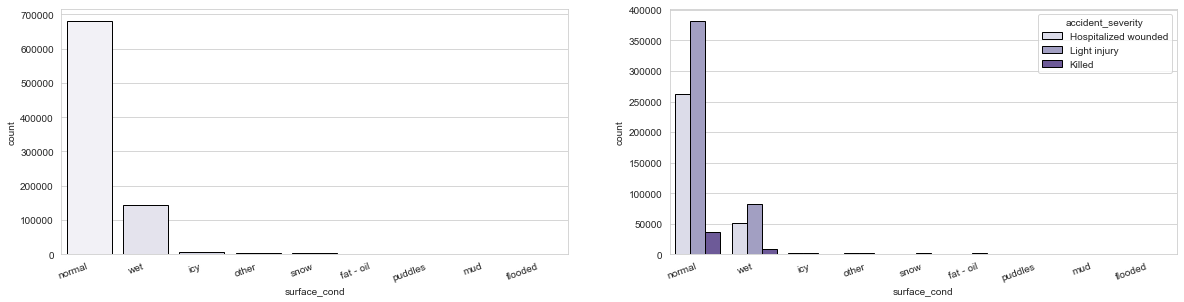

In [26]:
compare_plots(df["surface_cond"], "Purples")

Experiences a class imbalance<br>
Classes can be grouped to just **normal** and **not normal**

In [27]:
df["surface_cond"].value_counts()

normal       680337
wet          143254
icy            5474
other          4483
snow           2643
fat - oil      2159
puddles         861
mud             466
flooded         308
Name: surface_cond, dtype: int64

In [28]:
df["surface_cond"].replace(to_replace=["wet", "icy", "other", "snow", "fat - oil", "puddles", "mud", "flooded"],
                           value="not normal", inplace=True)

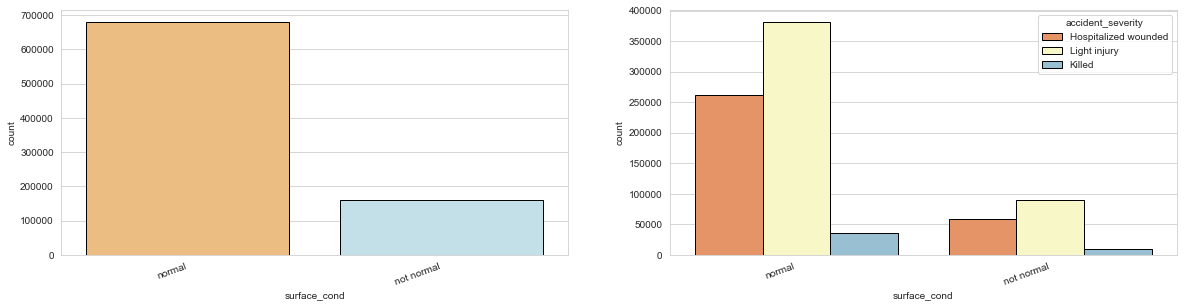

In [29]:
compare_plots(df["surface_cond"], "RdYlBu")

## Accident Situation

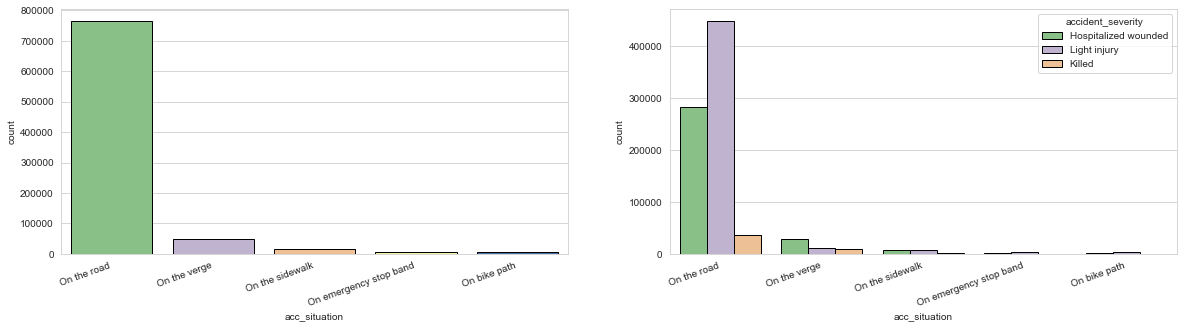

In [30]:
compare_plots(df["acc_situation"], "Accent")

In [31]:
df["acc_situation"].value_counts()

On the road               766362
On the verge               48818
On the sidewalk            14493
On emergency stop band      5191
On bike path                5121
Name: acc_situation, dtype: int64

Classes are grouped to accidents **On the road** and **Off the road** 

In [32]:
df["acc_situation"].replace(to_replace=["On the verge", "On the sidewalk", "On emergency stop band", "On bike path"],
                                        value="Off the road", inplace=True)

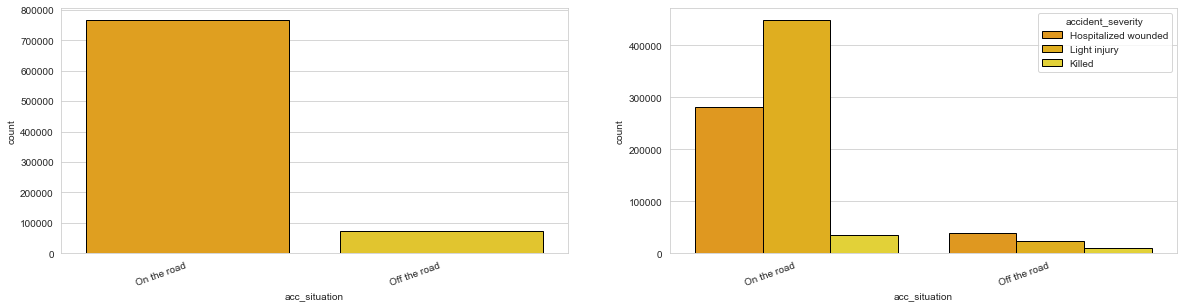

In [33]:
compare_plots(df["acc_situation"], "Wistia_r")

## Dropping columns

- **Accident ID, Minute, Vehicle ID and Postal Address** should not be used in our prediction, as these features do not influence real life accident situations in any logical way
- The **date** column can be dropped as the analysis above shows there is no much variation on accident severity across different date intervals.

In [34]:
df.drop(columns=["Num_Acc", "vehicle_ID", "postal_address", "minute", "date"], inplace=True)

In [35]:
df.head()

,hour,lighting,intersection,atmosphere,collision,localisation,user_category,accident_severity,user_sex,pedestrian_action,road_category,traff_regime,longitud_profile,drawing_plan,surface_cond,acc_situation
0,14,Full day,Out of intersection,Cloudy weather,By the side,In built-up areas,Driver,Hospitalized wounded,Male,not specified,Departmental Road,Bidirectional,Dish,Curved right,normal,On the road
1,18,Full day,In intersection,Normal,Other,In built-up areas,Passenger,Hospitalized wounded,Female,not specified,Departmental Road,One way,Dish,Curved left,normal,On the road
2,19,Full day,Out of intersection,Normal,Other,Out of agglomeration,Pedestrian,Hospitalized wounded,Male,Opposite direction of the vehicle,Departmental Road,Bidirectional,Dish,Curved right,not normal,Off the road
3,19,Twilight or dawn,Out of intersection,Dazzling weather,By the side,In built-up areas,Driver,Hospitalized wounded,Male,not specified,Communal Way,Bidirectional,Dish,Straight part,normal,On the road
4,11,Full day,In intersection,Normal,By the side,In built-up areas,Passenger,Hospitalized wounded,Female,not specified,Communal Way,Bidirectional,Dish,Straight part,normal,On the road


In [36]:
df.to_csv("model_dataset.csv", index=False)

*****

# Feature Importance
Further analysis can be done as a safe check to avoid dropping any important feature.<br>
A simple random forest algorithm can be used to estimate feature importance

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report

In [38]:
df = pd.read_csv("model_dataset.csv")

In [39]:
le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [40]:
X = df.drop(columns=["accident_severity"])
Y = df["accident_severity"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [41]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [42]:
y_pred = rnd_clf.predict(x_test)

In [43]:
# Quick metrices report
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.569653,0.216466,0.685716,0.641752,0.490612,0.615342
recall,0.460165,0.067251,0.822061,0.641752,0.449826,0.641752
f1-score,0.509089,0.102620,0.747724,0.641752,0.453144,0.620688
support,96524.000000,13918.000000,141554.000000,0.641752,251996.000000,251996.000000


Model is suffering from a class imbalance, but this will be ignored as we just need rough estimates

In [44]:
scores = {}

# Get feature importance from the model
for feature, score in zip(x_train.columns, rnd_clf.feature_importances_):
    scores[feature] = score

# Sort the scores from highest to lowest
scores = sorted(scores.items(), key=lambda x:x[1], reverse=True)

for key, value in scores:
    print(key, value)

hour 0.2859266397782531
localisation 0.1301906056018643
road_category 0.10159728558001505
collision 0.08889566271207174
atmosphere 0.06880025887479012
traff_regime 0.05352899758415379
lighting 0.047954248408786496
drawing_plan 0.04659707782974005
longitud_profile 0.041350307523358075
user_category 0.033717090009602324
pedestrian_action 0.022584841857511695
user_sex 0.020900166480139468
acc_situation 0.019468948639887455
intersection 0.01929784798470466
surface_cond 0.019190021135121745


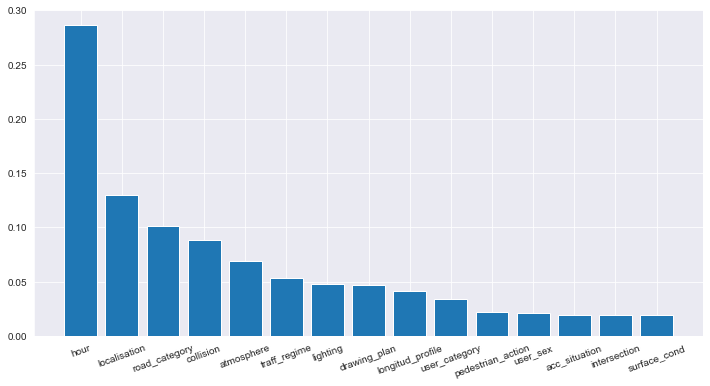

In [45]:
# Plot metrices
s = dict(scores)

sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt.bar(range(len(s)), list(s.values()))
plt.xticks(range(len(s)), list(s.keys()), rotation=20)
plt.show()